--------1.-------
--------load data----------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
-----cleaning data------
Nulls
=====
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI    

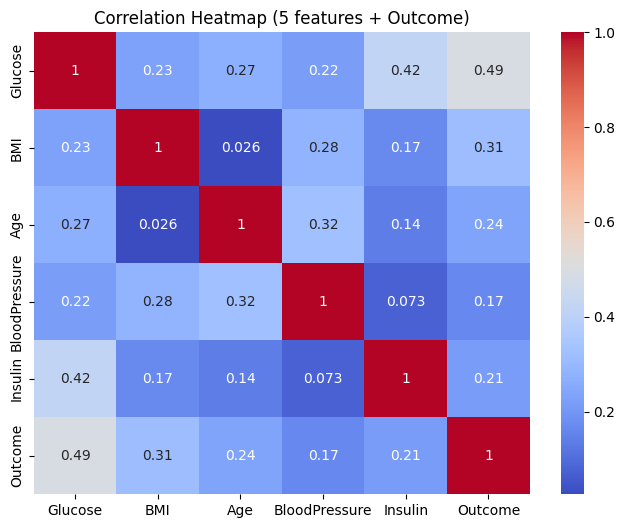

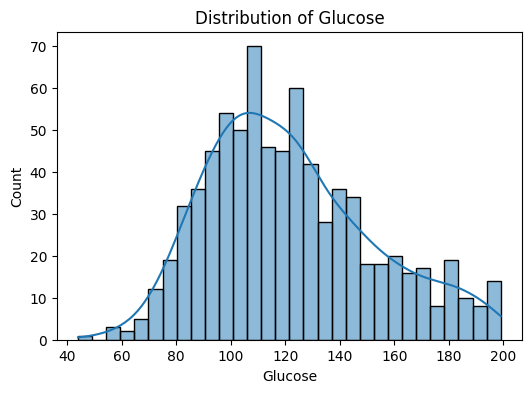

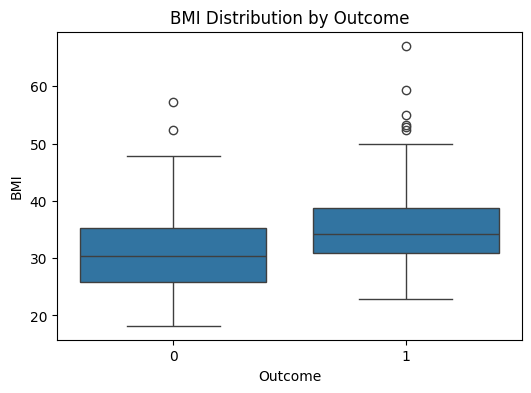

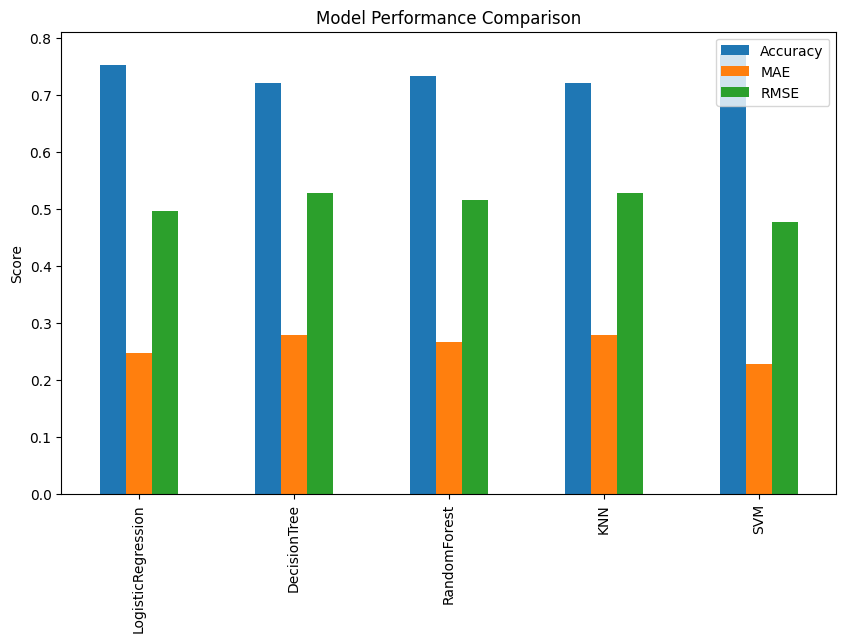

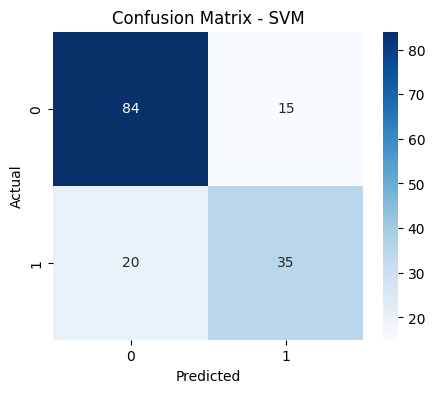

Best model 'SVM' saved as best_model.pkl


In [4]:
# Pham Thanh Long - B22DCCN505

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

from sklearn.metrics import accuracy_score, mean_absolute_error, mean_squared_error,confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

print("--------1.-------")

# load data 
print("--------load data----------")
df = pd.read_csv('diabetes.csv')
df.info()

# Cleaning data
print("-----cleaning data------")

# ---check for null values---
print("Nulls")
print("=====")
print(df.isnull().sum())

#---check for 0s---
print("0s")
print("==")
print(df.eq(0).sum())

# replace the 0 values with NaN for selected columns
print("--------Replace value-------")

cols = ['Glucose','BloodPressure','SkinThickness',
        'Insulin','BMI','DiabetesPedigreeFunction','Age']

df[cols] = df[cols].replace(0, np.nan)

# fill NaN with the mean of each column
df.fillna(df.mean(), inplace=True)

# check again
print(df.eq(0).sum())

# select 5 features (not 3) and Using 5 models in Basic Machine 
print("------2.---------")

# so do tuong quan 
corr = df.corr(method='pearson', numeric_only=True)
print(corr)

# select 5 features
features = ['Glucose','BMI','Age','BloodPressure','Insulin']
X = df[features]
y = df['Outcome']

# Chia dữ liệu train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train & predict với từng model ( 5 model co ban trong machine learning)
models = {
    "LogisticRegression": LogisticRegression(max_iter=1000),
    "DecisionTree": DecisionTreeClassifier(random_state=42),
    "RandomForest": RandomForestClassifier(n_estimators=100, random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "SVM": SVC(kernel='linear')
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    results[name] = y_pred

# 3. Evaluate and compare with metrics: accuracy, mae, mse, rmse. Explain metrics
print("------3------")

metrics = {}
for name, y_pred in results.items():
    acc = accuracy_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    metrics[name] = {"Accuracy": acc, "MAE": mae, "MSE": mse, "RMSE": rmse}

metrics_df = pd.DataFrame(metrics).T
print(metrics_df)


# ====================================
# 4. Visualization (Visualize and show with 5 types of diagrams)
# ====================================
print("-----------4----------")

# (1) Heatmap correlation
plt.figure(figsize=(8,6))
sns.heatmap(df[features + ['Outcome']].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap (5 features + Outcome)")
plt.show()

# (2) Histogram of Glucose
plt.figure(figsize=(6,4))
sns.histplot(df['Glucose'], bins=30, kde=True)
plt.title("Distribution of Glucose")
plt.show()

# (3) Boxplot BMI vs Outcome
plt.figure(figsize=(6,4))
sns.boxplot(x='Outcome', y='BMI', data=df)
plt.title("BMI Distribution by Outcome")
plt.show()

# (4) Bar chart of metrics
metrics_df[['Accuracy','MAE','RMSE']].plot(kind='bar', figsize=(10,6))
plt.title("Model Performance Comparison")
plt.ylabel("Score")
plt.show()

# (5) Confusion Matrix heatmap for RandomForest (ví dụ)
best_model_name = metrics_df['Accuracy'].idxmax()
cm = confusion_matrix(y_test, results[best_model_name])
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=[0,1], yticklabels=[0,1])
plt.title(f"Confusion Matrix - {best_model_name}")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


# =======================
# 4. Save Best Model
# =======================
best_model = models[best_model_name]
with open("best_model.pkl", "wb") as f:
    pickle.dump(best_model, f)

print(f"Best model '{best_model_name}' saved as best_model.pkl")
